In [2]:
import geopandas as gpd
import pandas as pd
import shapely

In [3]:
df = pd.read_csv(r"data/gtfs_subway/shapes.txt")
df['route_id'] = df['shape_id'].str.split('.').str[0]

In [4]:
df['route_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F',
       'FS', 'G', 'GS', 'H', 'J', 'L', 'M', 'N', 'Q', 'R', 'SI'],
      dtype=object)

In [9]:
# gpd.read_file(r"data/routes.geojson").explore()

In [12]:
df1 = pd.read_csv('1shape.csv')

In [16]:
gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.shape_pt_lon, df1.shape_pt_lat), crs=4326)
gdf.explore()

In [6]:
mp = gdf.union_all()
individual_points = [(pt.x, pt.y) for pt in mp.geoms]

In [7]:
geom_1 = shapely.LineString(individual_points)

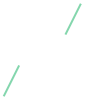

In [20]:
shapely.MultiLineString([[[0, 0], [1, 2]], [[4, 4], [5, 6]]])

In [22]:
shape = df1.to_dict(orient='records')

In [29]:
mls = []
for i in range(len(shape)):
    if i == len(shape) - 1:
        break
    p1 = (shape[i]['shape_pt_lon'], shape[i]['shape_pt_lat'])
    p2 = (shape[i+1]['shape_pt_lon'], shape[i+1]['shape_pt_lat'])
    mls.append(shapely.LineString([p1, p2]))
mls = shapely.MultiLineString(mls)

In [30]:
gpd.GeoDataFrame(geometry=[mls], crs=4326).explore()

In [19]:
geom_1.coords.xy

(array('d', [-74.015127, -74.015127, -74.015126, -74.015125, -74.015125, -74.015123, -74.015122, -74.015119, -74.015115, -74.015109, -74.015102, -74.015094, -74.015086, -74.015076, -74.015065, -74.015052, -74.015041, -74.015035, -74.015028, -74.015019, -74.015009, -74.014997, -74.014983, -74.014968, -74.014952, -74.014933, -74.014914, -74.014893, -74.01487, -74.014846, -74.01483, -74.01482, -74.014792, -74.013783, -74.013664, -74.013471, -74.012648, -74.012529, -74.012375, -74.012259, -74.012188, -74.012108, -74.012094, -74.012076, -74.012057, -74.012035, -74.012012, -74.011986, -74.011959, -74.011929, -74.011897, -74.011864, -74.011828, -74.011791, -74.011751, -74.01171, -74.011667, -74.011138, -74.011116, -74.011094, -74.011073, -74.011052, -74.011032, -74.011011, -74.010992, -74.010972, -74.010953, -74.010935, -74.010917, -74.010899, -74.010882, -74.010865, -74.010848, -74.010573, -74.010473, -74.010188, -74.009299, -74.009266, -74.007249, -74.007227, -74.007206, -74.007186, -74.007

In [8]:
gpd.GeoDataFrame(geometry=[geom_1], crs=4326).explore()

In [13]:
gdf.dissolve().explore()